# BIG MART SALES PREDICTION

## Feel free to ask doubts, give suggestions and upvote if you like my work :)

## Importing files

In [74]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
df=pd.read_csv('data/Train.csv')

## Let's explore training data

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C8966D978>,
      dtype=object)

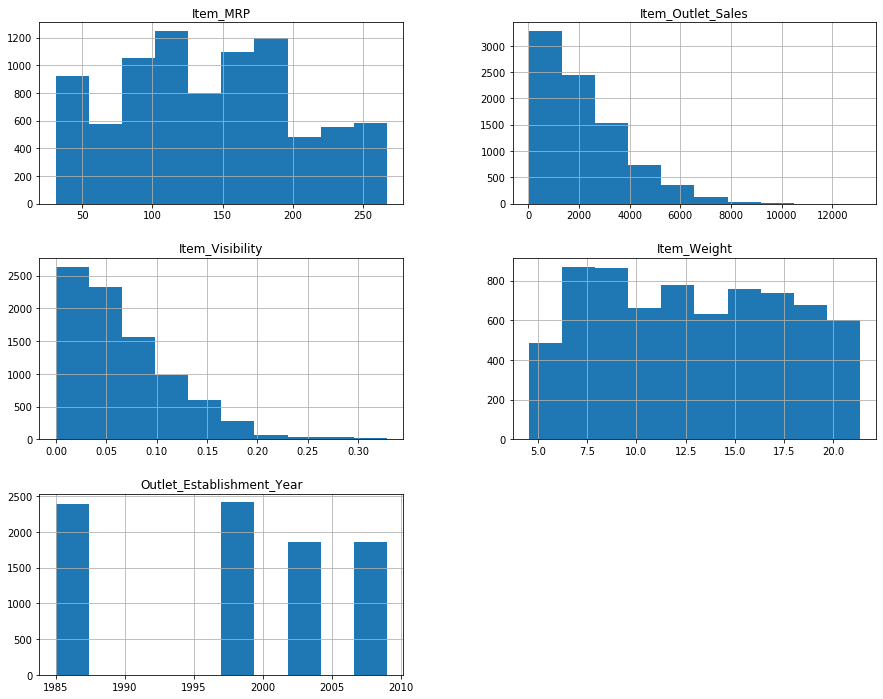

In [5]:
df.hist(figsize=(15,12))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## Column ITEM WEIGHT and OUTLET SIZE contain missing values. 

## Lets see correlation b/w target and features

In [7]:
corr_matrix=df.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

## ITEM_MRP seems to have a good correlation with targeted ITEM_OUTLET_SALES and other columns are not very useful for prediction of target value

## Lets start checking columns relation with Target ITEM_OUTLET_SALES Price
## First is ITEM_IDENTIFIER

In [8]:
df.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDX31     9
FDW26     9
FDV60     9
FDX20     9
FDW49     9
FDQ40     9
FDG09     9
FDV38     9
NCI54     9
NCY18     9
NCL31     9
FDP25     9
FDF56     9
NCQ06     9
FDX04     9
FDU12     9
FDF52     9
DRE49     9
NCJ30     9
DRN47     9
FDO19     9
NCF42     9
NCB18     9
FDT07     9
FDD38     9
FDT55     8
NCK05     8
FDG38     8
         ..
NCX53     2
FDF38     2
NCV18     2
FDH22     2
DRL59     2
FDW10     2
NCW30     2
FDZ50     2
FDR03     2
DRE01     2
FDM38     2
FDE38     2
FDI36     2
FDW58     2
FDP15     2
NCM42     2
DRI59     2
FDM16     2
FDB47     2
FDD48     2
FDD22     2
FDK57     1
FDQ60     1
FDC23     1
FDN52     1
FDY43     1
FDE52     1
FDO33     1
DRF48     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

## From above output we can say that ITEM_IDENTIFIER should be categorical columns
## Since ITEM_WEIGHT column correlation strength is very low so we can drop it
## Next Column is ITEM_FAT_CONTENT

In [9]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

## LF, low fat belong to same category that is Low Fat and reg belong to Regular category so replacing LF, low fat and reg to thier category by

In [10]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')

In [11]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [12]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## For further data processing we need to convert column type into their correct type

In [13]:
df.Item_Identifier=df.Item_Identifier.astype('category')
df.Item_Fat_Content=df.Item_Fat_Content.astype('category')
df.Item_Type=df.Item_Type.astype('category')
df.Outlet_Identifier=df.Outlet_Identifier.astype('category')
df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.astype('int64')

df.Outlet_Type=df.Outlet_Type.astype('category')
df.Outlet_Location_Type=df.Outlet_Location_Type.astype('category')
df.Outlet_Size=df.Outlet_Size.astype('category')

## Now ITEM_MRP column. Correlation strength of this column with target column is very high so we need can exploit this column for further infomation about target column

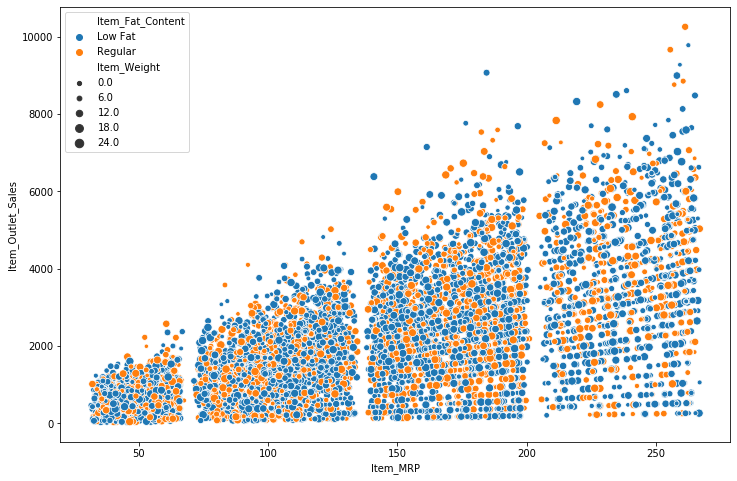

In [14]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)

## ITEM_MRP column contain prices which are in clusters so it would be better if we convert this columnn into bins for further processing

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


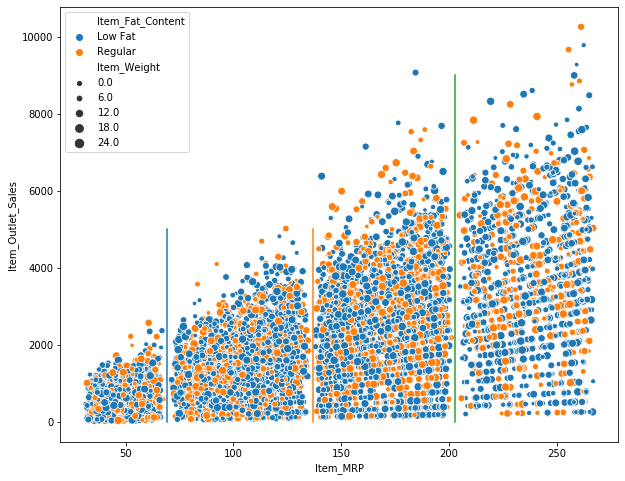

In [16]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

## We can use these perpendicular lines to divide data into proper bins. So from above graph we got out bin value. Now

In [17]:
df.Item_MRP=pd.cut(df.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Now lets explore other columns

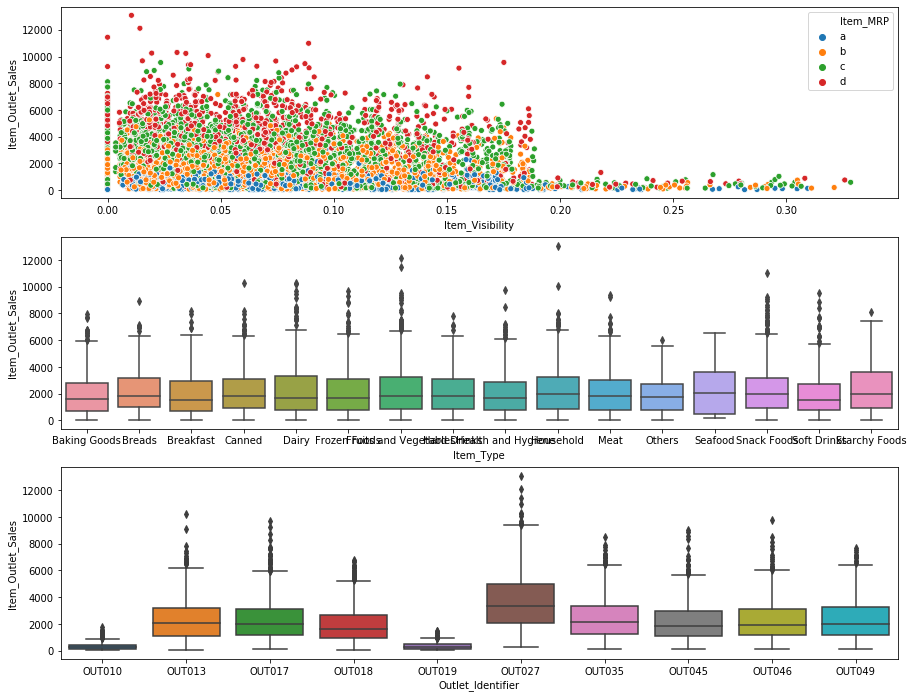

In [19]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=df)

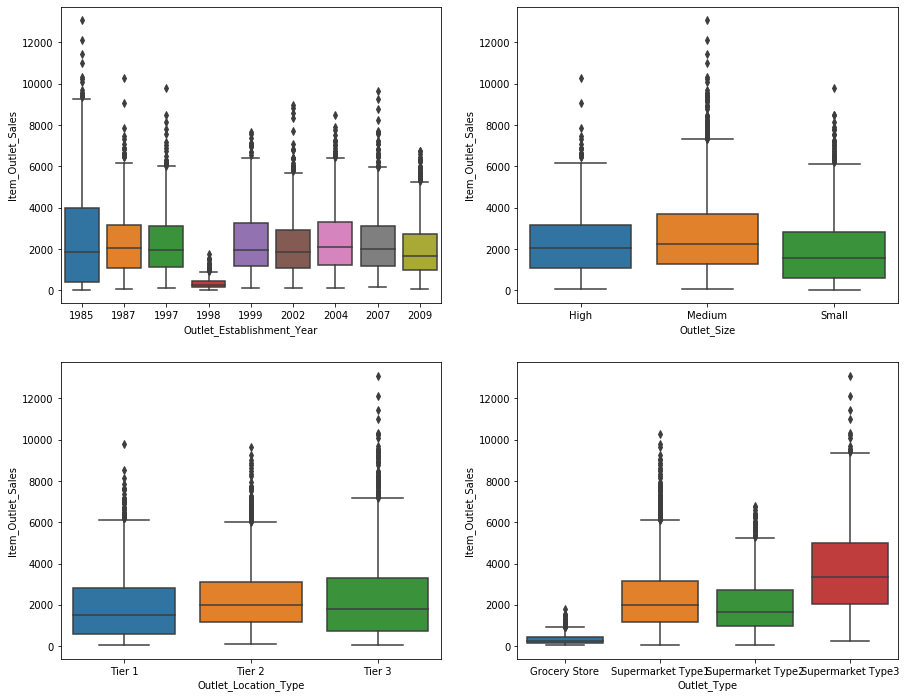

In [20]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

## From above plots we can say that we can drop ITEM_VISIBILiTY along with ITEM_WEIGHT . Further more both of these column have very low correlation strength with target column.

## Therefore Columns for model training will be

In [21]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

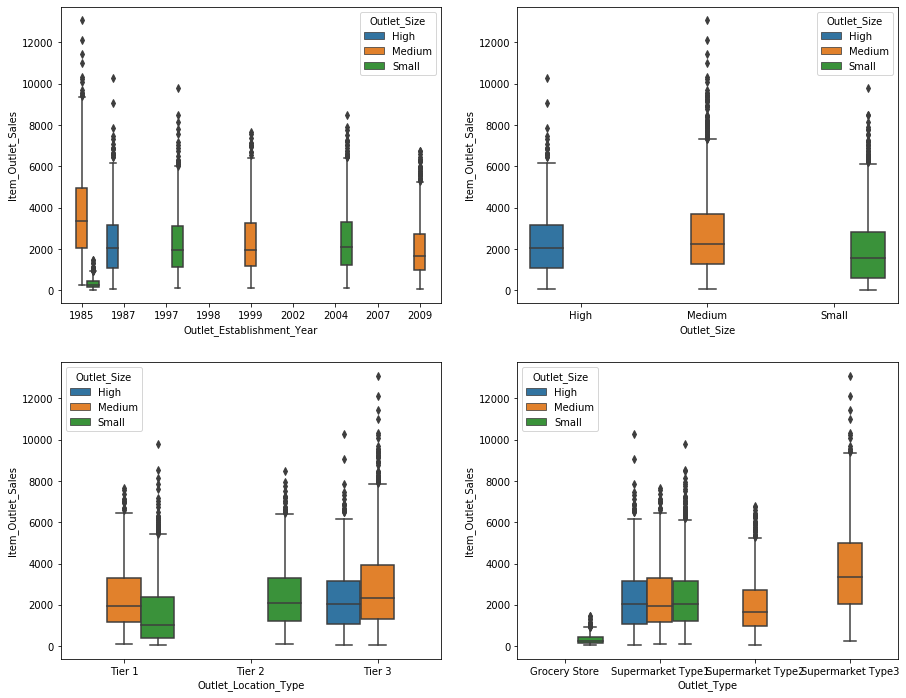

In [22]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)

In [23]:
data=df[attributes]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_MRP                     8523 non-null category
Outlet_Type                  8523 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Size                  6113 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Identifier            8523 non-null category
Item_Type                    8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(6), float64(1), int64(1)
memory usage: 184.9 KB


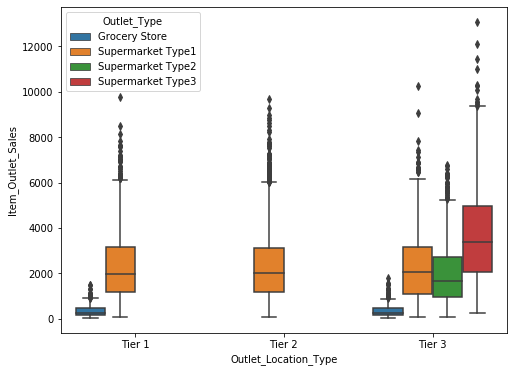

In [25]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=data)

In [26]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
33,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Breads,2174.5028
45,c,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,358.2004
46,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Health and Hygiene,2428.8384
47,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,5815.0972


## One thing to observe is when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null furthermore when OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null 

In [27]:
data.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Tier 2      0
Name: Outlet_Location_Type, dtype: int64

In [28]:
data.groupby('Outlet_Type').get_group('Grocery Store')

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
23,b,Grocery Store,Tier 1,Small,1985,OUT019,Baking Goods,214.3876
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
29,a,Grocery Store,Tier 1,Small,1985,OUT019,Canned,125.8362
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
45,c,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,358.2004
49,c,Grocery Store,Tier 1,Small,1985,OUT019,Dairy,780.3176
59,c,Grocery Store,Tier 1,Small,1985,OUT019,Canned,892.1720
63,a,Grocery Store,Tier 1,Small,1985,OUT019,Frozen Foods,147.8076
65,c,Grocery Store,Tier 3,NaN,1998,OUT010,Snack Foods,184.4266


In [29]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [30]:
(data.Outlet_Identifier=='OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [31]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

## Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) shop
## Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop

In [72]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [73]:
data.Outlet_Size=data.apply(func,axis=1)
data

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,d,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,a,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,c,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,c,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,a,1987,OUT013,Household,994.7052
5,a,Supermarket Type2,Tier 3,a,2009,OUT018,Baking Goods,556.6088
6,a,Supermarket Type1,Tier 3,a,1987,OUT013,Snack Foods,343.5528
7,b,Supermarket Type3,Tier 3,b,1985,OUT027,Snack Foods,4022.7636
8,b,Supermarket Type1,Tier 2,b,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,c,2007,OUT017,Frozen Foods,4710.5350


## Now lets checkout OUTLIERS 

In [34]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,d,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,a,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,c,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,c,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,a,1987,OUT013,Household,994.7052


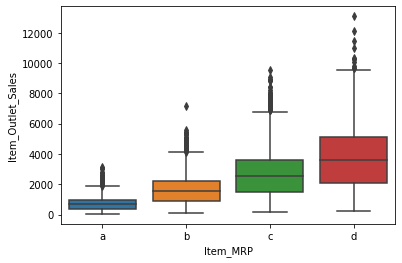

In [35]:
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

In [36]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.max()

7158.6816

In [37]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,d,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,b,1985,OUT027,Household,7158.6816


In [38]:
data=data.drop(index=7796)
data.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].max()

5582.733

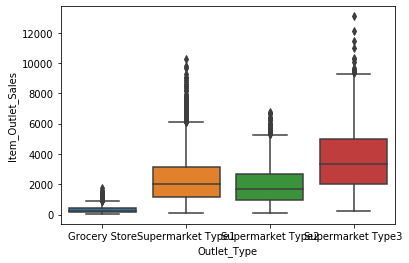

In [39]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

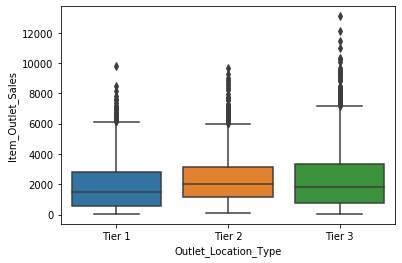

In [40]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)

In [41]:
data[data.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [42]:
data[data['Item_Outlet_Sales']==9779.9362]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,d,1997,OUT046,Health and Hygiene,9779.9362


In [43]:
data=data.drop(index=4289)

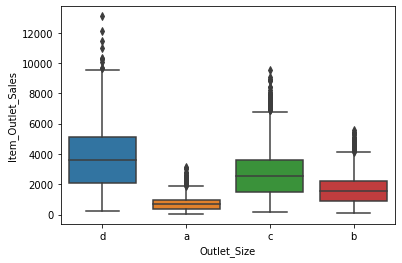

In [44]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)

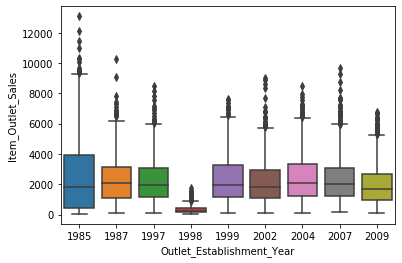

In [45]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

In [46]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('category')
data_label=data.Item_Outlet_Sales
data_dummy=pd.get_dummies(data.iloc[:,0:6])

In [47]:
data_dummy['Item_Outlet_Sales']=data_label

In [48]:
data_dummy

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,443.4228
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,732.3800
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,994.7052
5,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,556.6088
6,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,343.5528
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,4022.7636
8,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1076.5986
9,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,4710.5350


# Now we are ready to apply ML algorithms

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train,test = train_test_split(data_dummy,test_size=0.20,random_state=2019)

In [51]:
train.shape , test.shape

((6816, 35), (1705, 35))

In [52]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

# Applying Linear Regression 


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr=LinearRegression()

In [55]:
lr.fit(train,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
predict_lr=lr.predict(test)

In [58]:
mse=mean_squared_error(test_labe
                       ,predict_lr)

In [59]:
lr_score=np.sqrt(mse)

In [60]:
lr_score

1169.642860685401

# Cross Val for Linear Regression

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [63]:
lr_score_cross=np.sqrt(-score)

In [64]:
np.mean(lr_score_cross),np.std(lr_score_cross)

(1148.778509309342, 32.42767210712416)

# Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(train,train_label)
predict_r=r.predict(test)
mse=mean_squared_error(test_label,predict_r)
r_score=np.sqrt(mse)
r_score

1170.8362071061267

# Cross Val Ridge

In [66]:
r=Ridge(alpha=0.05,solver='cholesky')
score=cross_val_score(r,train,train_label,cv=10,scoring='neg_mean_squared_error')
r_score_cross=np.sqrt(-score)
np.mean(r_score_cross),np.std(r_score_cross)

(1148.0004939635598, 33.21382895301169)

# LASSO

In [67]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.01)
l.fit(train,train_label)
predict_l=l.predict(test)
mse=mean_squared_error(test_label,predict_l)
l_score=np.sqrt(mse)
l_score

1170.8379343600718

# Cross VAl LAsso

In [68]:
l=Lasso(alpha=0.01)
score=cross_val_score(l,train,train_label,cv=10,scoring='neg_mean_squared_error')
l_score_cross=np.sqrt(-score)
np.mean(l_score_cross),np.std(l_score_cross)

(1148.0004285351881, 33.21601770572291)

# Elastic NEt

In [69]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
en.fit(train,train_label)
predict_r=en.predict(test)
mse=mean_squared_error(test_label,predict_r)
en_score=np.sqrt(mse)
en_score

1171.9700046424414

# Cross val Elastic

In [70]:
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
score=cross_val_score(en,train,train_label,cv=10,scoring='neg_mean_squared_error')
en_score_cross=np.sqrt(-score)
np.mean(en_score_cross),np.std(en_score_cross)

(1148.1235514055243, 33.779501585825265)

# Stochastic gradient

In [71]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty='l2',n_iter=100,alpha=0.05)
sgd.fit(train,train_label)
predict_r=sgd.predict(test)
mse=mean_squared_error(test_label,predict_r)
sgd_score=np.sqrt(mse)
sgd_score

TypeError: __init__() got an unexpected keyword argument 'n_iter'

# Cross Val Stochastic Gradient

In [ ]:
sgd=SGDRegressor(penalty='l2',n_iter=100,alpha=0.05)
score=cross_val_score(sgd,train,train_label,cv=10,scoring='neg_mean_squared_error')
sgd_score_cross=np.sqrt(-score)
np.mean(sgd_score_cross),np.std(sgd_score_cross)

# SVR

In [ ]:
from sklearn.svm import SVR
svm=SVR(epsilon=15,kernel='linear')
svm.fit(train,train_label)
predict_r=svm.predict(test)
mse=mean_squared_error(test_label,predict_r)
svm_score=np.sqrt(mse)
svm_score

# Cross VAl SVR

In [ ]:
svm=SVR(epsilon=15,kernel='linear')
score=cross_val_score(svm,train,train_label,cv=10,scoring='neg_mean_squared_error')
svm_score_cross=np.sqrt(-score)
np.mean(svm_score_cross),np.std(svm_score_cross)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(train,train_label)
predict_r=dtr.predict(test)
mse=mean_squared_error(test_label,predict_r)
dtr_score=np.sqrt(mse)
dtr_score

# Cross Val Decision Tree

In [ ]:
dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,train,train_label,cv=10,scoring='neg_mean_squared_error')
dtr_score_cross=np.sqrt(-score)
np.mean(dtr_score_cross),np.std(dtr_score_cross)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train,train_label)
predict_r=rf.predict(test)
mse=mean_squared_error(test_label,predict_r)
rf_score=np.sqrt(mse)
rf_score

# Cross Val RandomForest

In [ ]:
rf=RandomForestRegressor()
score=cross_val_score(rf,train,train_label,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

# Bagging Regressoion

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
br=BaggingRegressor(max_samples=70)

In [ ]:
br.fit(train,train_label)

In [ ]:
score=br.predict(test)

In [ ]:
br_score=mean_squared_error(test_label,score)

In [ ]:
br_score=np.sqrt(br_score)
br_score

# Cross Val Bagging

In [ ]:
br=BaggingRegressor()
score=cross_val_score(br,train,train_label,cv=10,scoring='neg_mean_squared_error')
br_score_cross=np.sqrt(-score)
np.mean(br_score_cross),np.std(br_score_cross)

# ADAPTIVE BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(train,train_label)
g=ada.predict(test)
ada_score=mean_squared_error(test_label,g)
ada_score=np.sqrt(ada_score)
ada_score

# Cross val for ADA BOOST

In [ ]:
ada=AdaBoostRegressor()
score=cross_val_score(ada,train,train_label,cv=10,scoring='neg_mean_squared_error')
ada_score_cross=np.sqrt(-score)
np.mean(ada_score_cross),np.std(ada_score_cross)

# Gradient BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train,train_label)
p=gbr.predict(test)
gb_score=mean_squared_error(test_label,p)
gb_score=np.sqrt(gb_score)
gb_score

# Cross Val for Gb

In [ ]:
gb=GradientBoostingRegressor()
score=cross_val_score(gb,train,train_label,cv=10,scoring='neg_mean_squared_error')
gb_score_cross=np.sqrt(-score)
np.mean(gb_score_cross),np.std(gb_score_cross)

# Dataframe


In [ ]:
name=['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Elastic Net Regression','Elastic Net Regression CV','SGD Regression','SGD Regression CV',
     'SVM','SVM CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV','Ada Boost','Ada Boost CV',
     'Bagging','Bagging CV','Gradient Boost','Gradient Boost CV']

In [ ]:
go=pd.DataFrame({'RMSE':[lr_score,lr_score_cross,r_score,r_score_cross,l_score,l_score_cross,en_score,en_score_cross,
                     sgd_score,sgd_score_cross,svm_score,svm_score_cross,dtr_score,dtr_score_cross,rf_score,rf_score_cross,
                     ada_score,ada_score_cross,br_score,br_score_cross,gb_score,gb_score_cross]},index=name)

In [ ]:
go['RMSE']=go.applymap(lambda x: x.mean())

In [ ]:
go.RMSE.sort_values()

In [ ]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),predict_r[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),p[0:100:10],color='yellow')
plt.scatter(np.arange(1,100,10),test_label[0:100:10],color='black')
plt.legend(['Random_Forest','Gradient Boosting','Real Value'])


# It seems like Gradient Boosting doing better than others
# So lets Do grid search on to tune hyper parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gb=GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.01)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]
gs=GridSearchCV(gb,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(train,train_label)

In [ ]:
gs.best_estimator_

In [ ]:
gb=gs.best_estimator_

# Now Train our model on Training Data

In [ ]:
total=pd.concat([train,test],axis=0,ignore_index=True)

In [ ]:
total_label=pd.concat([train_label,test_label],axis=0,ignore_index=True)

In [ ]:
total_label.shape,total.shape

In [ ]:
gb.fit(total,total_label)

# TEST IMPORTING

In [ ]:
test=pd.read_csv('../input/Test.csv')

In [ ]:
test.shape

# Test Data Preprocessing

In [ ]:
attributes=['Item_MRP',
 'Outlet_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Item_Type']

In [ ]:
test=test[attributes]

In [ ]:
test.shape

In [ ]:
test.info()

In [ ]:
test.Item_MRP=pd.cut(test.Item_MRP,bins=[25,75,140,205,270],labels=['a','b','c','d'],right=True)
test.Item_Type=test.Item_Type.astype('category')
test.Outlet_Size=test.Outlet_Size.astype('category')
test.Outlet_Identifier=test.Outlet_Identifier.astype('category')
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('int64')
test.Outlet_Type=test.Outlet_Type.astype('category')
test.Outlet_Location_Type=test.Outlet_Location_Type.astype('category')

In [ ]:
test.info()

In [ ]:
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('category')

In [ ]:
test.info()

In [ ]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [ ]:
test.Outlet_Size=test.apply(func,axis=1)

In [ ]:
test_dummy=pd.get_dummies(test.iloc[:,0:6])

In [ ]:
test_dummy.head()

# Now predict price of test data with our ML Model

In [ ]:
predict=gb.predict(test_dummy)

In [ ]:
predict.shape

In [ ]:
sample=pd.read_csv('../input/Submission.csv')

In [ ]:
sample.head()

In [ ]:
del sample['Item_Outlet_Sales']

In [ ]:
df=pd.DataFrame({'Item_Outlet_Sales':predict})
corr_ans=pd.concat([sample,df],axis=1)
del corr_ans['Unnamed: 0']
corr_ans

In [ ]:
corr_ans.to_csv('correct.csv',index=None)

# Feel free to give your suggestions and don't forget to give upvote :)